In [1]:
%config Completer.use_jedi = False                                       
import warnings                                                             
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd                                                         
import matplotlib.pyplot as plt                                            
import matplotlib as mpl                                                    
mpl.rcParams['axes.unicode_minus'] = False                                  
#plt.rcParams('font.family') = 'RIDIBatang'                          
#plt.rcParams('font.size') = 16                                             
import matplotlib.font_manager as fm
font = 'C:\\Windows\\Fonts\\RIDIBatang.otf'
fontprop = fm.FontProperties(fname=font, size=16).get_name()
plt.rc('font', family = 'RIDIBatang')
plt.rc('font', size = 16)
import seaborn as sns                                                       
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

***
의사결정 트리 (Decision Tree)
***
의사결정 트리는 데이터 분류나 회귀에 사용되는 지도학습 알고리즘으로 결과갑시 어떻게 나왔는지 이해하기가 가장 쉽고 정확도가 높은 장점이 있지만,  
과대 적합되기 쉬운 알고리즘이라는 단점도 있다.  


의사결정 트리 알고리즘은 스무고개와 상당히 비슷하다.  
데이터의 특징을 바탕으로 데이터를 연속적으로 분리하다 보면 결국 하나의 정답으로 데이터를 분류할 수 있는데,  
스무고개에서 적은 질문으로 정답을 맞추기 위해서는 의미있는 질문을 먼저 하는 것이 중요하듯 의사결정 트리에서도 의미있는 질문을 먼저 하는 것이 상당히 중요하다.  
데이터의 특징 속에서 분류에 큰 영향을 끼치는 특성을 발견하고 상위 노드를 선택하는 것이 의사결정 트리 알고리즘의 핵심이다.  

스무고개를 할 때 질문자는 질문을 하나 던질 때마다 약간씩의 정보를 획득한다.  
약간의 정보를 획득하는 과정은 정답에 대한 불확실성이 조금씩 줄어든다는 것과 같은 개념이다.  
정보 이론(Information Theory)에서는 불확실성을 수치적으로 표현한 값을 엔트로피(Entropy)라고 표현하며,  
정보 이득(Information Gain(은 질문 이전의 엔트로피에서 질문 이후의 엔트로피를 뺀 값이 된다.  
즉, 불확실성이 줄어든 정도를 정보 이득이라고 한다.

***
지니 계수(Gini Index)
***
P ** 2 + Q ** 2으로 계산하면 불순도를 측정하는 자료로 데이터의 통계적 분석 정도를 정량화해서 표현한 것을 의미한다.  
Scikit-learn의 의사결정 트리는 CART(Classification And Regression Tree) 타입의 의사결정 트리이며,
CART는 트리의 노드마다 특징을 이진 분류하는 특징이 있기에 Scikit-learn은 의사결정 트리를 구성할 때 지니 계수를 사용한다. 
<img src="./gini_coefficency.png" width="800px">

***
문제 정의  
***
서울 지역(구)의 위도와 경도 정보를 학습해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류하는 모델을 구현한다.  
즉, 특정 지역이 강동인지, 강북인지, 강서인지, 강남인지 알아내는 모델을 구현한다.  


***
데이터 획득
***
district -> 구, dong -> 동, latitude -> 위도, longitude -> 경도, label -> 강동, 강서, 강북, 강남으로 구분한 지역

In [2]:
# 구 데이터 -> 학습 데이터
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

# 동 데이터 -> 테스트 데이터
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [3]:
train_df = pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [4]:
test_df = pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


***
학습 데이터와 테스트 데이터의 분포를 확인한다. 
***

In [5]:
print('train_df.label')
print(train_df.label.value_counts())
print('test_df.label')
print(test_df.label.value_counts())

train_df.label
Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64
test_df.label
Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64


--------------------------------------------------


<Figure size 800x600 with 0 Axes>

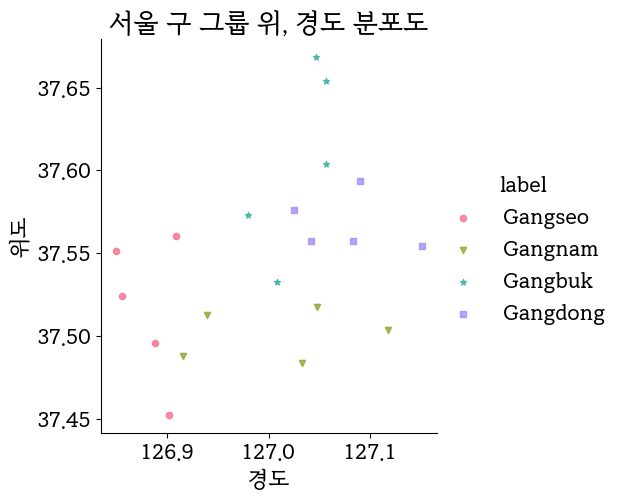

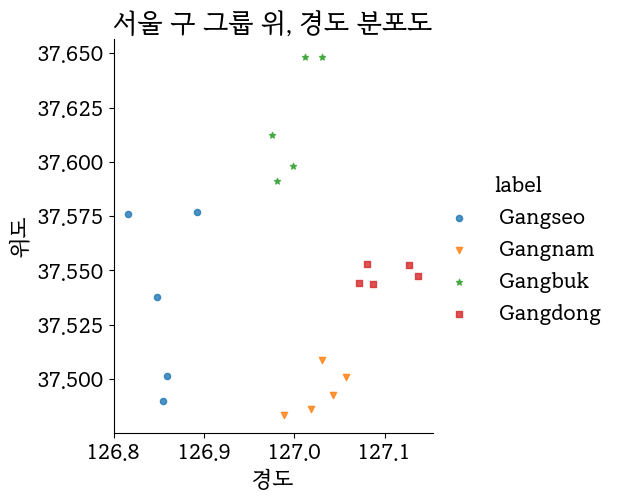

In [6]:
plt.figure(figsize=[8, 6])
sns.lmplot(
    data=train_df, x='longitude', y='latitude', fit_reg=False,
    hue='label', 
    scatter_kws={'s': 20},
    markers=['o','v', '*', 's'],
    palette='husl'
)
plt.title('서울 구 그룹 위, 경도 분포도')
plt.xlabel('경도')
plt.ylabel('위도')
print('--------------------------------------------------')
sns.lmplot(
    data=test_df, x='longitude', y='latitude', fit_reg=False,
    hue='label', 
    scatter_kws={'s': 20},
    markers=['o','v', '*', 's']
)
plt.title('서울 구 그룹 위, 경도 분포도')
plt.xlabel('경도')
plt.ylabel('위도')

plt.show()

***
데이터 전처리
***
위의 시각화를 통해 구 이름과 동 이름이 학습이나 테스트에 별 영향을 미치지 않는다는 것을 알았으므로 학습 및 테스트 데이터에서 필요없는 피쳐를 제거한다.  

In [7]:
# 학습 데이터에서 구 제거
train_df.drop(['district'], axis=1, inplace=True)
train_df.head()

,latitude,longitude,label
0,37.551000,126.849500,Gangseo
1,37.524240,126.855396,Gangseo
2,37.495400,126.887400,Gangseo
3,37.451900,126.902000,Gangseo
4,37.560229,126.908728,Gangseo


In [8]:
# 테스트 데이터에서 동 제거
test_df.drop(['dong'], axis=1 ,inplace=True)
test_df.head()

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo


***
의사 결정 트리 모델 학습 
***

In [9]:
x_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]
x_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [10]:
# 데이터를 모델화시키고 학습을 위해 숫자로 만들어야 하기때문에 import 한다
from sklearn.preprocessing import LabelEncoder
# Scikit-learn 의사결정 트리를 사용하기 위해 import 한다.
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Gangbuk -> 0, Gangdong -> 1, Gangnam -> 2, Gangseo -> 3
le = LabelEncoder() #LabelEncoder 객체를 만든다.
y_encoded = le.fit(y_train) # 학습시킨다.
#y_encoded = y_encoded.transform(y_train) # 학습 결과를 반영한다. -> 문자로 되어있는 레이블을 숫자로 만든다.
#fit_transform() 메소드는 학습된 결과를 바로 반영시킨다.
y_encoded = y_encoded.fit_transform(y_train)
print(y_encoded) 
#classeds_ 속성은 LableEncoder 객체를 사용해 숫자로 변환한 원래 레이블 데이터를 얻어온다.
print(le.classes_)

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
['Gangbuk' 'Gangdong' 'Gangnam' 'Gangseo']


In [12]:
#DecisionTreeClassifier 객체로 의사결정 트리를 학습시킨다.
# Scikit-learn의 의사결정 트리 알고리즘 구동시 random하게 특성들과 데이터 건수를 선택하는 로직이 포함되어있기 때문에
# random_state 속성에 특정 값을 지정하여 수행시마다 동일한 트리를 만들수 있도록 한다.
#clf = DecisionTreeClassifier()
#clf.fit(x_train, y_encoded)
clf = DecisionTreeClassifier(random_state=35).fit(x_train, y_encoded)

***
학습된 의사결정 트리 시각화
***

In [25]:
# 학습된 의사 결정 트리를 시각화하는 함수
def display_decision_surface(clf, x, y):
    # 그래프 크기
    #plt.figure(figsize=[6,6])
    x_min = x.longitude.min() - 0.01
    x_max = x.longitude.max() + 0.01
    y_min = x.latitude.min() - 0.01
    y_max = x.latitude.max() + 0.01
    
    n_classes = len(le.classes_) #레이블갯수
    #print(n_classes)
    plot_color = 'rbwy' # 그래프에 사용할 포인트 색상
    plot_step = 0.001 # 그래프 눈금 간격
    
    # 그래프의 눈금
    #meshgrid() 메소드는 좌표 벡터로부터 좌표 행렬을 리턴한다.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    #print(xx, yy)
    
    #등고선 차트를 시각화할 데이터를 예측한다.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #print(Z)
    Z = Z.reshape(xx.shape)
    #print('type -> {}'.format(type(Z)))
    #print('shape -> {}, dimension -> {}, dtype -> {}'.format(Z.shape, Z.ndim, Z.dtype))
    #print('Data -> \n{}'.format(Z))
    
    #등고선 차트를 그린다.
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel('경도')
    plt.ylabel('위도')
    plt.title('학습된 의사결정 트리 영역 그래프')
    
    #-------------------------------------------
    
    for i, color in zip(range(n_classes), plot_color):
        #print(i, color)
        #where() 메소드는 조건을 만족하는 값의 인덱스를 리턴한다.
        idx = np.where(y == i)
        #print(idx)
        plt.scatter(x=x.loc[idx].longitude, y=x.loc[idx].latitude,
                    c=color, edgecolors='black', s=25, label=le.classes_[i])
    plt.legend(loc=2, bbox_to_anchor=[1, 1], fontsize=16)
    plt.rcParams['figure.figsize' ] = [6, 6]
    plt.rcParams['font.family'] = 'RIDIBatang'
    
    plt.show()

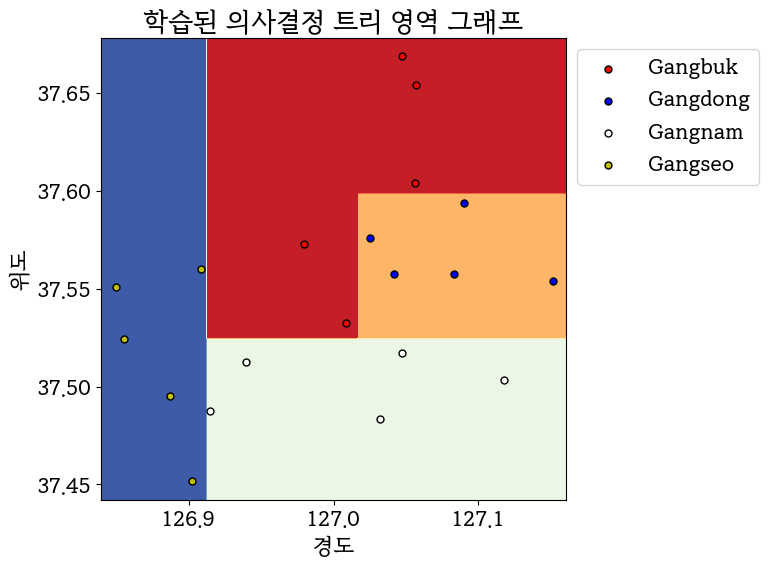

In [26]:
display_decision_surface(clf, x_train, y_encoded) 

***
의사결정 트리는 과대 적합되기 상당히 쉬운 모델이다.  

여기서는 아무런 파라미터 설정없이 학습 데이터를 학습한 의사결정 트리의 결정 표면(색으로 표시되는 부분)을 시각화하였다.  
강북 사이에 강동에 해당되는 데이터가 보이고, 강동 사이에 강북에 해당되는 데이터가 보이는 것으로 봐서  
학습 데이터에만 너무 치우치게 학습되었다는 것을 알 수 있다.  
즉, 과대 적합되었다고 판단할 수 있다.  
***
Scikit-learn의 의사결정 트리는 과대 적합을 피할 수 있도록 별도의 파라미터를 제공하는데,  
제공되는 파라미터를 설정하지 않을 경우 모델은 학습되지만 과대 적합될 가능성이 상당히 높다.  


***
graphviz 라이브러리를 이용한 의사결정 트리 시각화  
graphviz 라이브러리는 의사결정 트리 모델이 학습한 결과를 트리 형태로 시각화한다
***
graphviz 라이브러리를 사용하려면 아래의 과정을 먼저 실행해야한다.
graphviz 홈페이지에서 설치파일을 다운받아 설치한다.  
path 환경변수에 C:/Program Files/Graphviz/bin을 추가한다. -> graphviz 8.1.0 버전부터 설치할 때 자동으로 추가할 수 있음.  
conda install graphviz를 실행서 graphviz 라이브러리를 추가한다.  


In [21]:
#graphviz 라이브러리를 사용하기 위해 import 한다.
import graphviz
#의사결정 트리의 학습 결과를 graphviz 라이브러리의 데이터(dot)로 사용로 만들기 위해 import 한다.
from sklearn.tree import export_graphviz

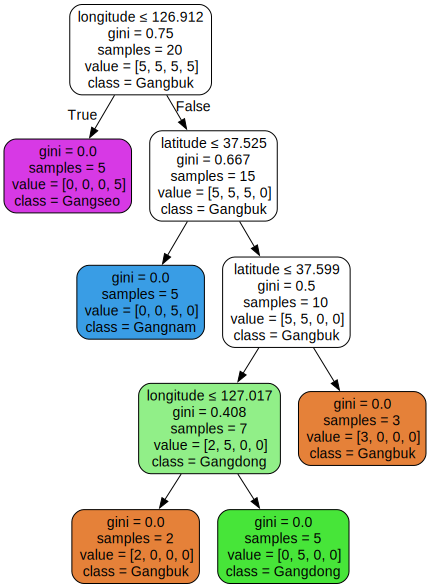

In [22]:
# export_graphviz(의사결정트리 모델, feature_names, class_names)
# filled=True 옵션을 지정하면 학습된 의사결정 트리의 노트에 색을 입힌다.
# rounded=True 옵션을 지정하면 의사결정 트리의 노드를 모서리가 둥근 사각형으로 만든다.
# special_characters = True 옵션을 지정하면 특수 문자를 표시한다.
# out_file=None 옵션을 지정하면 의사결정 트리르 문자열로 반환한다.
dot = export_graphviz(clf, feature_names=['longitude', 'latitude'], class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],
                      out_file=None, filled=True, rounded=True, special_characters=True )
graph = graphviz.Source(dot)
# render() 메소드로 렌더링된 의사결정 트리를 pdf 파일로 저장할 수 있다.
graph.render('./data/seoul')
graph

***
과대 적합을 피하기 위해 파라미터를  설정해서 학습한다.

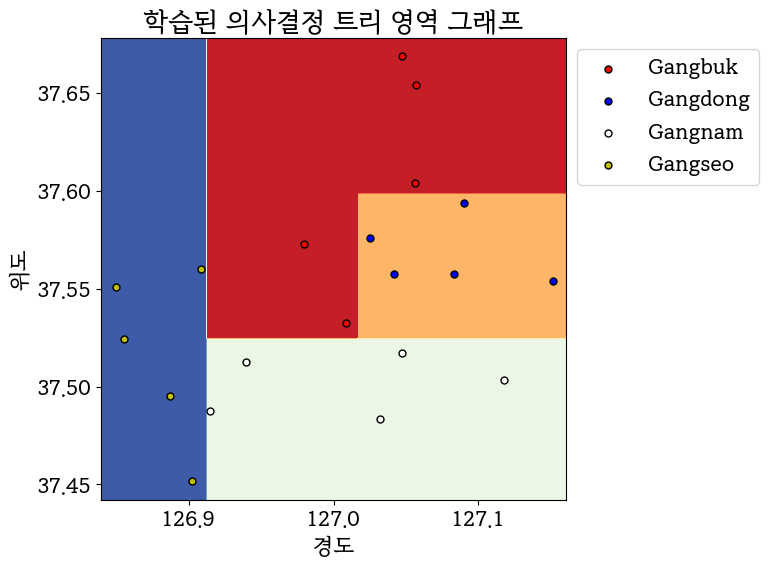

In [23]:
clf = DecisionTreeClassifier(random_state=70,
                             max_depth=4, #트리의 최대 깊이, 과대 적합을 방지하려면 max_depth를 지정해 주는 것이 좋다.
                            min_samples_split=2, # 자식 노드를 가지기 위한 최소한의 데이터 갯수를 지정한다.
                            min_samples_leaf=2 # 리프(터미널, 단노드) 노드의 최소 데이터 갯수를 지정한다.  
                            ).fit(x_train, y_encoded)
display_decision_surface(clf, x_train, y_encoded) 

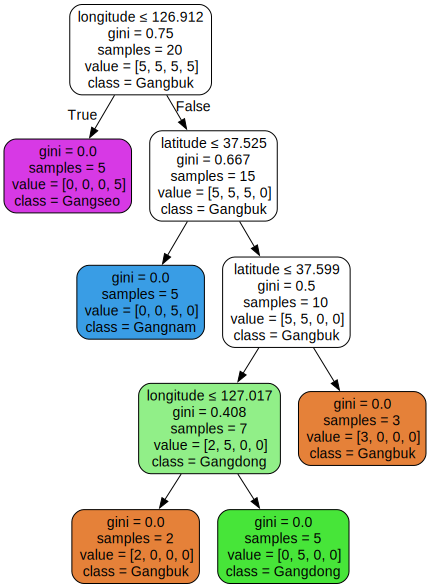

In [27]:
dot = export_graphviz(clf, feature_names=['longitude', 'latitude'], class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],
                      out_file=None, filled=True, rounded=True, special_characters=True )
graph = graphviz.Source(dot)
graph.render('./data/seoul2')
graph

***
모델 테스트
***

In [30]:
predict = clf.predict(x_test)
print(predict)
accuracy = accuracy_score(y_test.values.ravel(), le.classes_[predict])
print('정확도 -> {:6.2%}'.format(accuracy))

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
정확도 -> 100.00%


In [33]:
pd.DataFrame({'실제값' : y_test.values.ravel(), '예측값' : le.classes_[predict]})

,실제값,예측값
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


***
임의의 데이터 테스트
***

In [35]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangnam'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangdong'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'}
            ]
            

In [40]:
test_df = pd.DataFrame(dong_dict_list)
test_df.drop(['dong'], axis=1 ,inplace=True)
x_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [41]:
predict = clf.predict(x_test)
print(predict)
accuracy = accuracy_score(y_test.values.ravel(), le.classes_[predict])
print('정확도 -> {:6.2%}'.format(accuracy))

[3 3 3 3 3]
정확도 -> 60.00%


In [42]:
pd.DataFrame({'실제값' : y_test.values.ravel(), '예측값' : le.classes_[predict]})

,실제값,예측값
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangnam,Gangseo
3,Gangdong,Gangseo
4,Gangseo,Gangseo
